# Image classification with neural networks
In this problem, you will train a neural network to classify satellite images. In the data/EuroSAT_RGB directory, you will find 11 subdirectories, each corresponding to a different class of land or land use: e.g. industrial, crops, rivers, forest, etc. Within each subdirectory, you will find examples in .jpg format of each type. (Thus the name of the directory in which the image lives is the class label.)

Your job is to set up a neural network that can classify the images as accurately as possible. Use an 80/20 train test split. Summarize your model and its accuracy in any way you see fit, but make you include at a minimum the following elements:

* overall test-set accuracy, measured however you think is appropriate
* show some of the example images from the test set, together with your model's predicted classes.
* a confusion matrix showing the performance of the model on the set test, i.e. a table that cross-tabulates each test set example by (actual class, predicted class).

I strongly recommend the use of PyTorch in a Jupyter notebook for this problem; look into PyTorch's ImageFolder data set class, which will streamline things considerably.

In [22]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import tqdm

In [34]:
torch.manual_seed(1)

In [35]:
# Data transformations
transform = transforms.Compose([
    transforms.Resize((50, 50)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [36]:
dataset = datasets.ImageFolder(root='C:/Users/dines/OneDrive/Documents/Dinesh @ UTA/MSBA/Summer/Intro to Machine Learning/STA380-master/data/EuroSAT_RGB', transform=transform)

In [37]:
# Split dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [38]:
# Create data loaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)  # in_channels, out_channels, kernel_size, stride
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)  # Each channel gets zeroed out independently on each forward call with probability p
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(33856, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=33856, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [40]:
# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

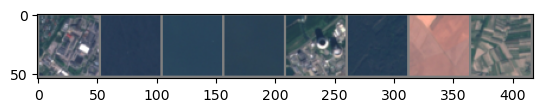

Predicted: 8 1 1 1 1 1 5 1


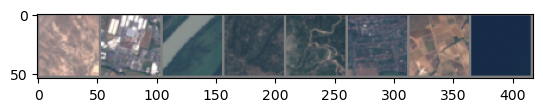

Predicted: 6 4 2 9 9 3 6 9


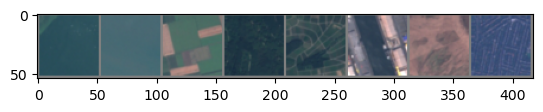

Predicted: 9 5 2 9 8 2 7 7


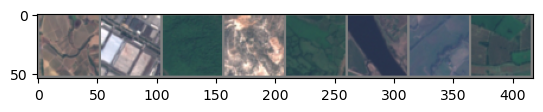

Predicted: 7 4 5 0 8 3 5 1


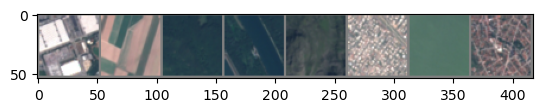

Predicted: 4 0 9 1 2 4 8 7


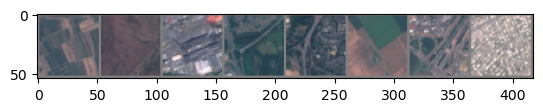

Predicted: 2 4 4 8 3 0 6 4


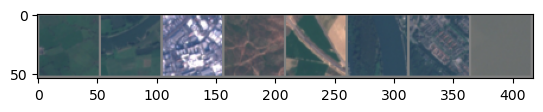

Predicted: 1 1 4 2 6 1 2 2


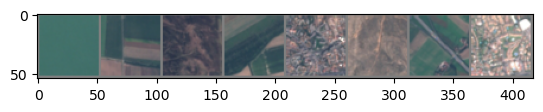

Predicted: 5 0 2 8 2 2 5 4


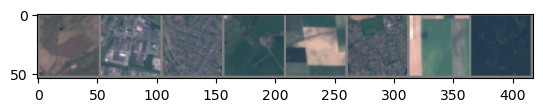

Predicted: 7 7 7 1 4 7 0 9


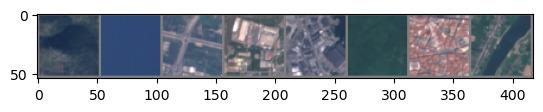

Predicted: 9 1 8 4 3 8 7 3


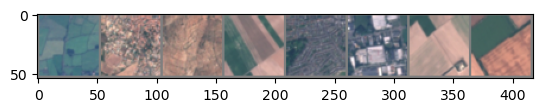

Predicted: 9 6 0 0 7 4 6 0


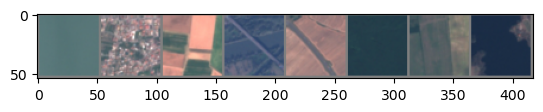

Predicted: 9 4 0 7 6 9 2 9


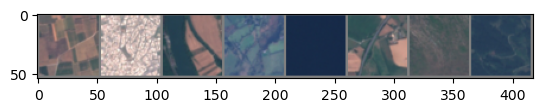

Predicted: 6 4 0 5 9 0 2 1


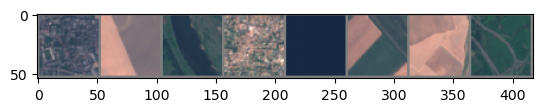

Predicted: 7 0 1 7 9 0 2 5


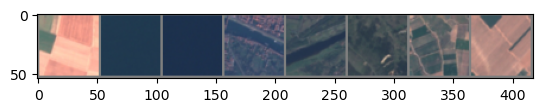

Predicted: 0 9 9 8 3 2 3 0


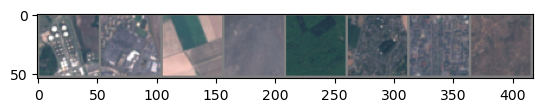

Predicted: 4 4 0 2 1 7 7 2


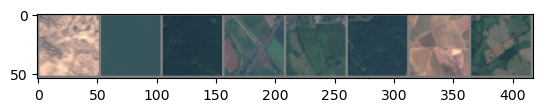

Predicted: 6 9 1 3 5 1 0 3


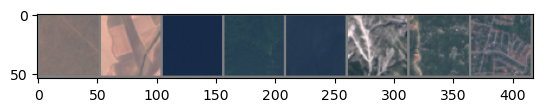

Predicted: 2 0 9 1 9 4 7 7


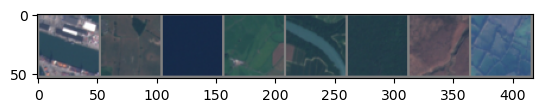

Predicted: 4 2 9 5 8 1 2 9


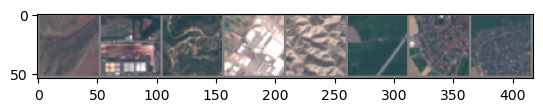

Predicted: 2 4 7 4 7 8 7 2


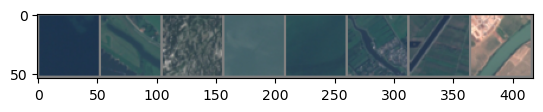

Predicted: 9 8 7 9 9 8 8 0


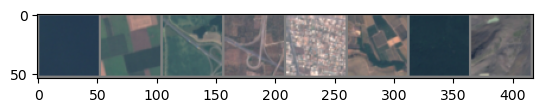

Predicted: 9 6 3 2 2 6 1 2


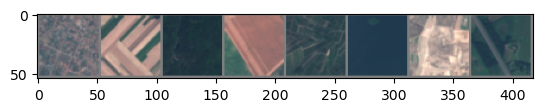

Predicted: 7 0 1 0 3 9 0 2


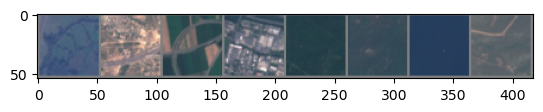

Predicted: 5 7 8 4 1 5 9 2


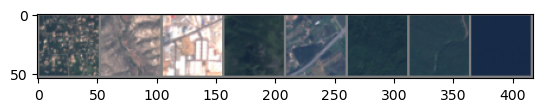

Predicted: 7 8 4 1 3 1 1 1


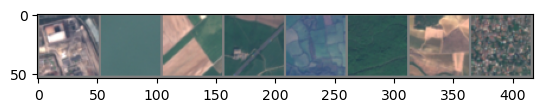

Predicted: 4 9 0 5 5 1 6 7


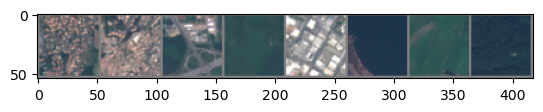

Predicted: 7 7 3 1 4 9 5 1


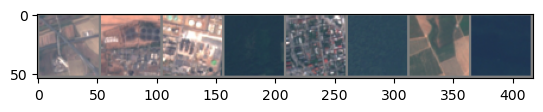

Predicted: 2 6 7 9 7 1 6 9


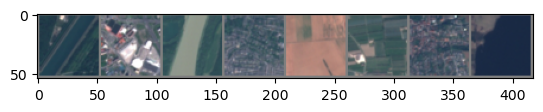

Predicted: 8 4 5 7 0 8 7 9


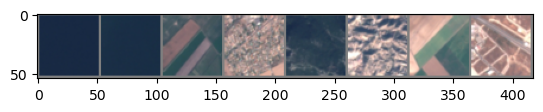

Predicted: 9 9 2 2 9 7 0 7


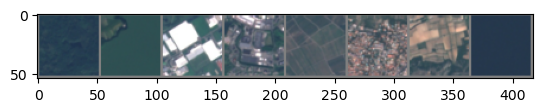

Predicted: 1 5 4 4 2 7 6 9


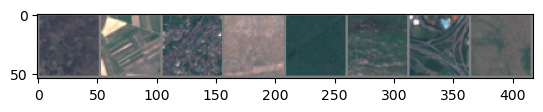

Predicted: 2 6 7 0 1 3 7 2


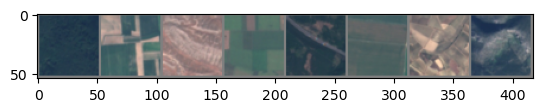

Predicted: 1 0 0 5 3 0 6 8


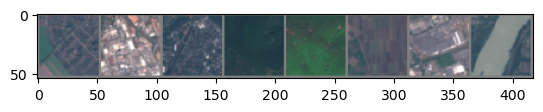

Predicted: 7 4 7 1 1 2 4 8
Epoch 1, Loss: 1.3336906373059307


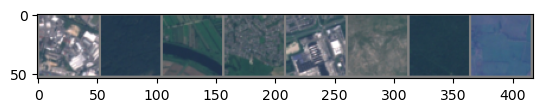

Predicted: 4 1 8 7 4 2 1 5


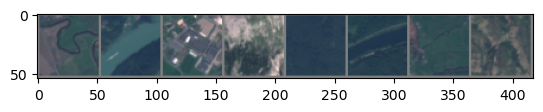

Predicted: 2 8 4 7 9 9 8 2


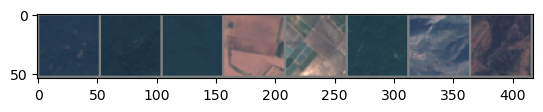

Predicted: 9 1 9 0 6 1 7 2


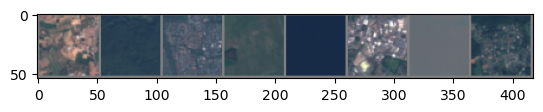

Predicted: 6 1 7 2 9 4 2 7


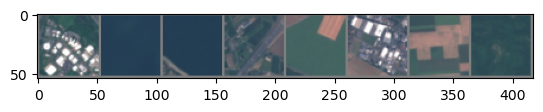

Predicted: 4 1 1 3 0 4 0 9


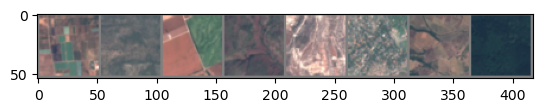

Predicted: 6 2 0 2 6 7 6 1


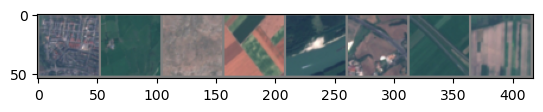

Predicted: 7 5 2 0 2 3 3 0


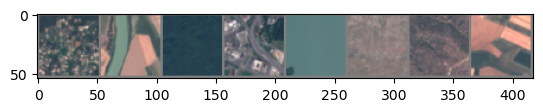

Predicted: 7 0 1 7 9 2 2 0


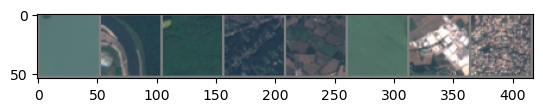

Predicted: 9 8 0 8 2 9 4 7


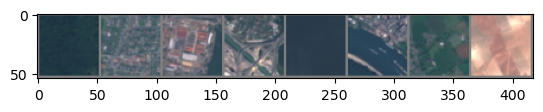

Predicted: 9 7 7 7 9 3 5 2


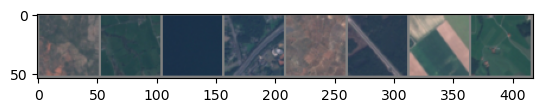

Predicted: 2 1 9 3 2 3 0 5


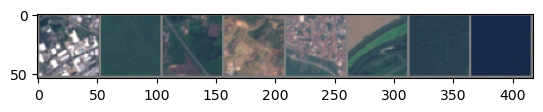

Predicted: 4 5 2 6 7 0 1 9


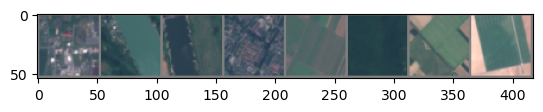

Predicted: 7 8 6 7 5 1 0 0


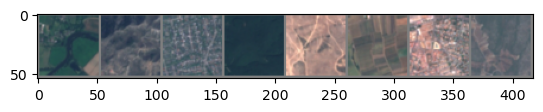

Predicted: 8 3 7 1 6 2 7 2


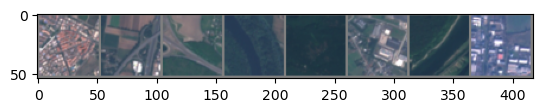

Predicted: 7 4 3 9 1 4 8 4


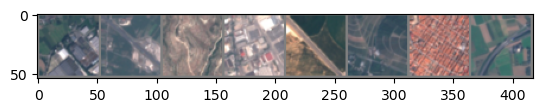

Predicted: 3 6 6 4 6 7 7 3


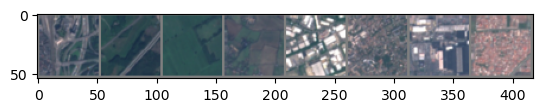

Predicted: 3 3 5 2 4 7 4 7


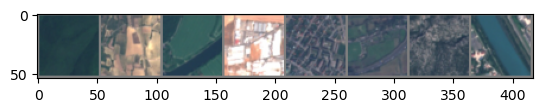

Predicted: 1 6 8 4 7 7 7 8


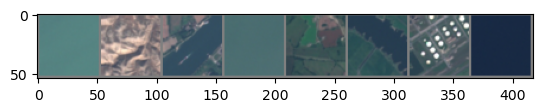

Predicted: 9 6 8 9 5 8 4 9


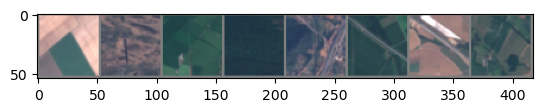

Predicted: 0 7 5 1 3 3 3 6


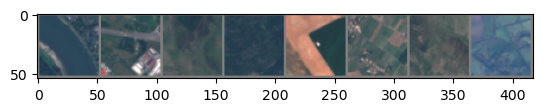

Predicted: 8 3 2 1 0 3 2 5


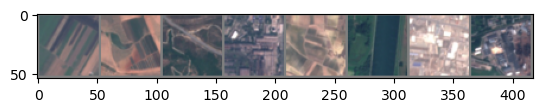

Predicted: 3 6 2 7 6 8 4 7


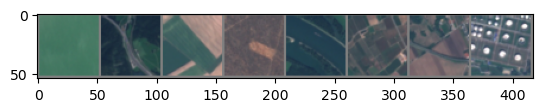

Predicted: 9 3 0 2 8 6 8 4


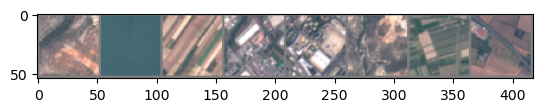

Predicted: 6 9 6 4 4 6 6 3


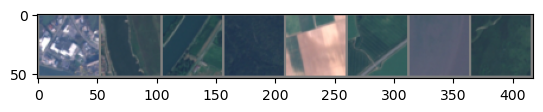

Predicted: 4 3 3 1 0 5 9 0


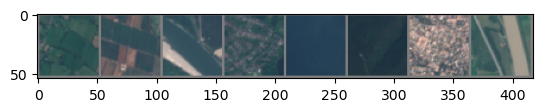

Predicted: 5 6 8 3 9 1 7 3


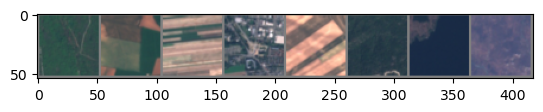

Predicted: 1 0 6 4 2 1 9 2


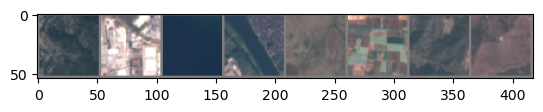

Predicted: 2 4 9 8 2 6 2 2


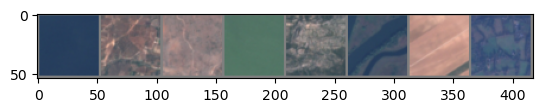

Predicted: 9 6 2 9 6 9 0 2


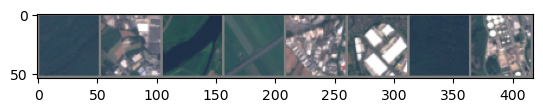

Predicted: 1 4 9 5 4 4 9 4


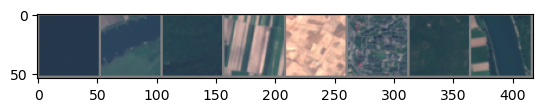

Predicted: 9 2 9 0 6 7 1 3


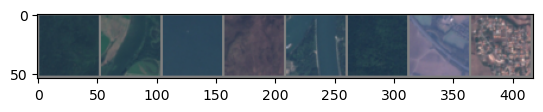

Predicted: 1 1 9 2 8 9 3 7


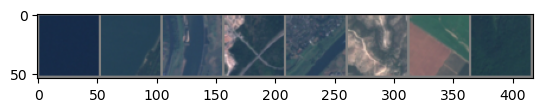

Predicted: 9 1 8 8 8 6 0 1


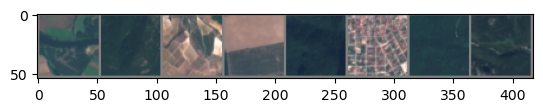

Predicted: 8 1 6 0 1 7 1 1
Epoch 2, Loss: 0.9124734715620677


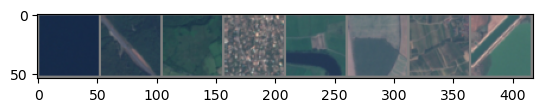

Predicted: 9 3 1 7 8 2 6 9


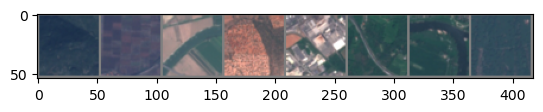

Predicted: 9 0 0 6 8 3 8 8


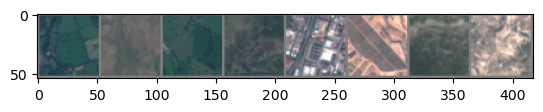

Predicted: 5 2 2 2 4 6 2 6


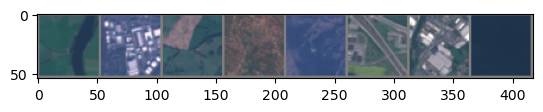

Predicted: 5 4 8 2 2 3 4 1


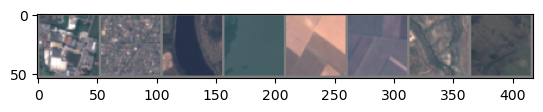

Predicted: 4 7 2 9 0 2 2 2


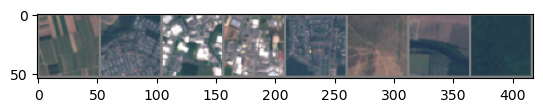

Predicted: 6 7 4 4 7 2 2 1


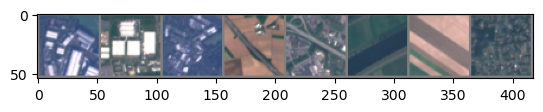

Predicted: 4 4 4 6 4 8 0 7


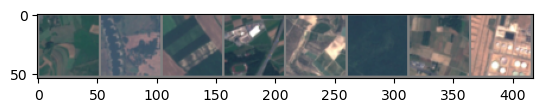

Predicted: 5 6 9 8 6 1 6 3


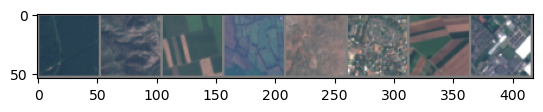

Predicted: 1 4 0 5 2 7 0 4


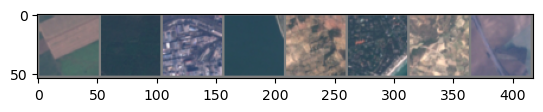

Predicted: 0 1 4 9 6 7 6 2


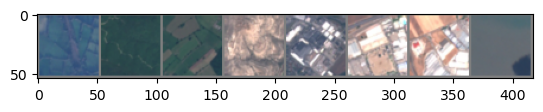

Predicted: 5 5 5 7 4 4 4 9


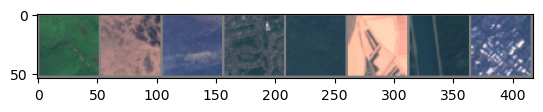

Predicted: 9 0 8 6 1 0 8 4


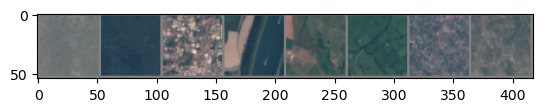

Predicted: 2 1 7 8 2 5 7 2


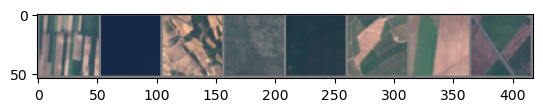

Predicted: 0 1 6 2 1 6 0 3


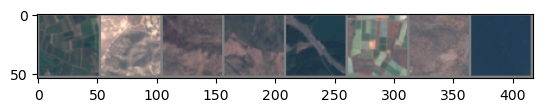

Predicted: 2 6 2 2 3 6 2 9


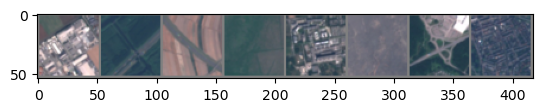

Predicted: 4 8 0 5 4 2 3 7


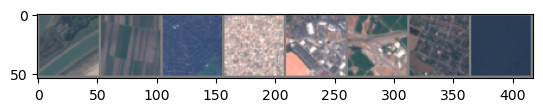

Predicted: 6 6 3 7 4 4 7 9


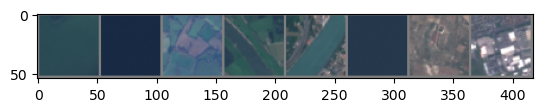

Predicted: 9 9 5 3 8 9 6 4


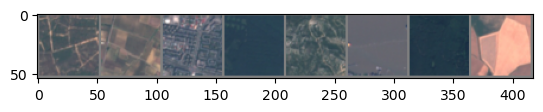

Predicted: 7 6 7 1 2 9 1 0


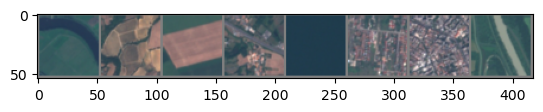

Predicted: 5 6 0 3 1 7 7 8


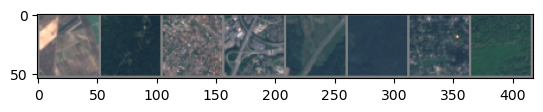

Predicted: 6 1 7 4 3 1 7 1


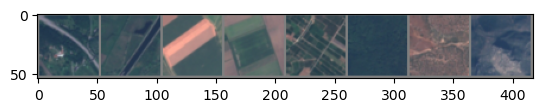

Predicted: 3 3 0 0 6 9 2 2


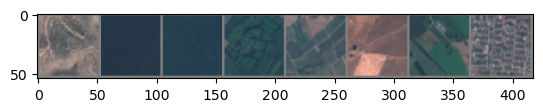

Predicted: 2 1 1 5 3 6 5 7


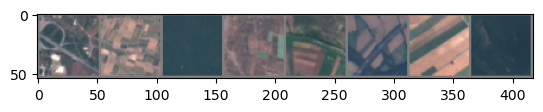

Predicted: 8 6 1 6 6 3 0 1


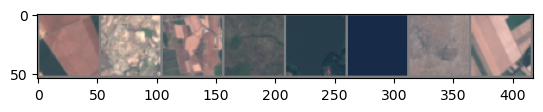

Predicted: 0 2 6 2 1 9 2 0


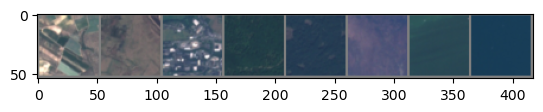

Predicted: 6 6 4 1 1 0 5 9


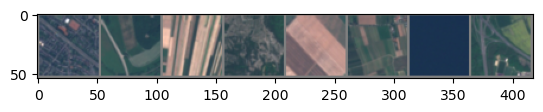

Predicted: 7 8 6 2 0 0 9 3


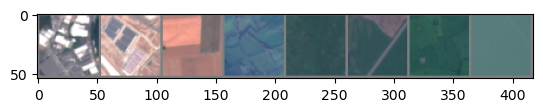

Predicted: 4 3 0 5 5 3 5 9


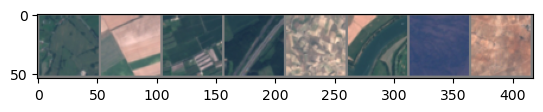

Predicted: 5 0 7 3 6 8 7 6


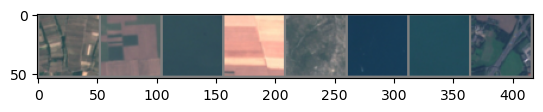

Predicted: 2 0 9 0 2 9 1 8


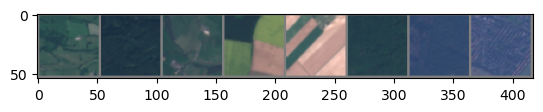

Predicted: 5 1 5 0 0 1 9 7


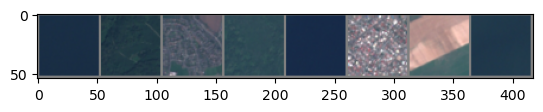

Predicted: 9 1 7 1 9 7 0 9


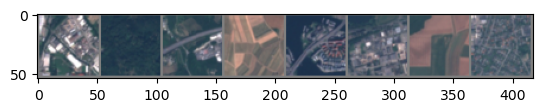

Predicted: 4 1 3 6 7 4 0 7


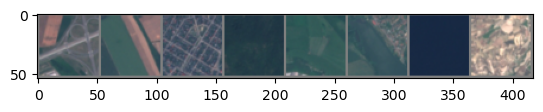

Predicted: 2 0 7 1 5 2 9 6
Epoch 3, Loss: 0.7511765005411926


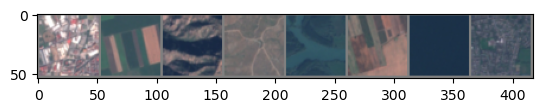

Predicted: 4 0 8 2 8 0 9 7


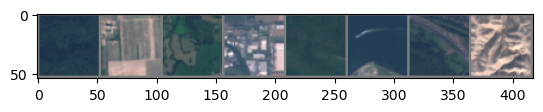

Predicted: 1 6 5 4 1 9 8 2


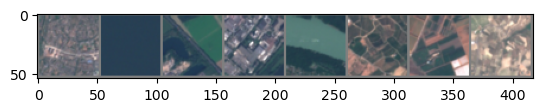

Predicted: 7 9 8 4 8 2 8 6


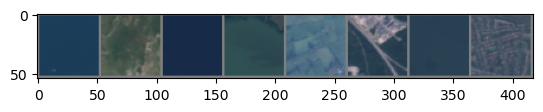

Predicted: 9 5 9 1 5 3 1 7


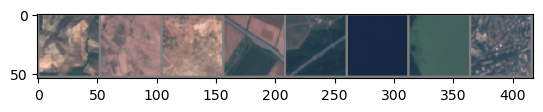

Predicted: 6 2 6 3 8 9 9 7


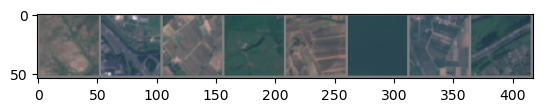

Predicted: 2 3 6 5 6 1 3 3


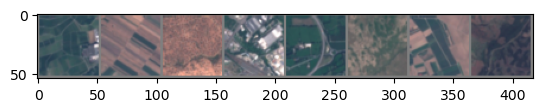

Predicted: 8 0 6 4 8 6 0 2


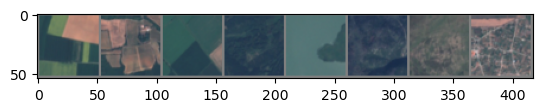

Predicted: 0 6 8 1 0 3 2 7


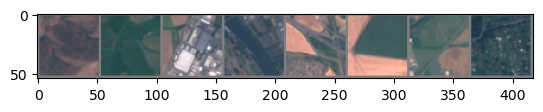

Predicted: 2 5 4 8 6 0 5 7


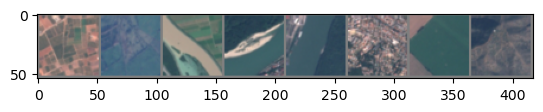

Predicted: 6 5 0 8 8 7 5 2


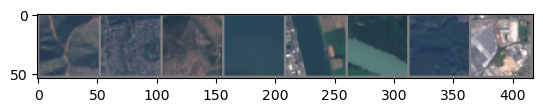

Predicted: 3 7 2 1 8 8 9 4


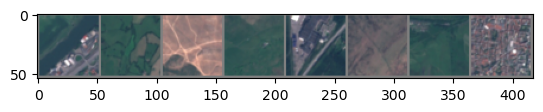

Predicted: 7 5 0 5 3 2 5 7


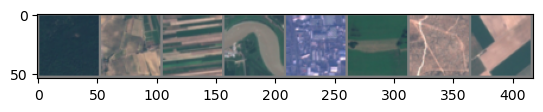

Predicted: 1 6 0 8 4 5 2 0


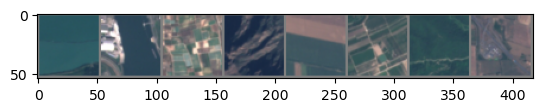

Predicted: 9 8 6 3 0 6 5 3


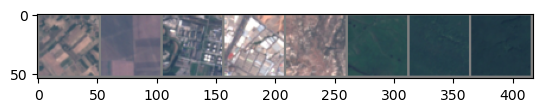

Predicted: 3 0 7 4 3 1 1 1


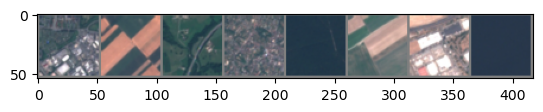

Predicted: 4 0 3 7 1 0 4 1


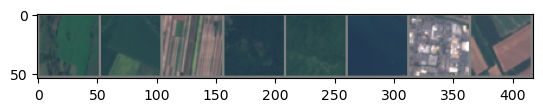

Predicted: 5 1 6 1 1 9 4 0


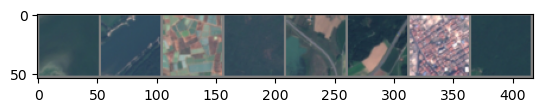

Predicted: 1 8 6 1 3 3 7 1


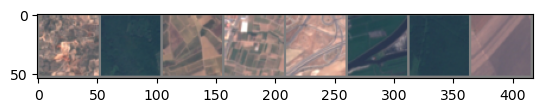

Predicted: 6 1 6 6 0 8 1 0


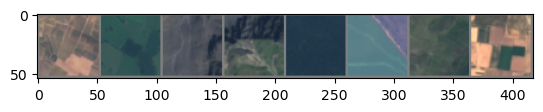

Predicted: 6 9 2 2 1 9 2 0


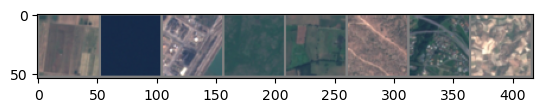

Predicted: 6 9 3 5 5 6 7 6


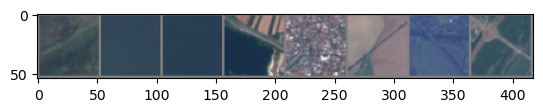

Predicted: 2 1 9 8 7 0 8 8


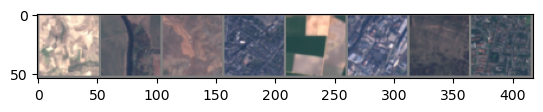

Predicted: 2 3 6 7 0 4 2 7


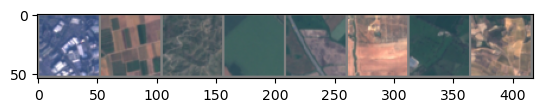

Predicted: 4 6 2 9 3 6 5 6


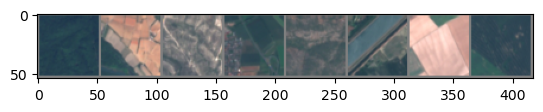

Predicted: 1 0 6 2 2 8 0 1


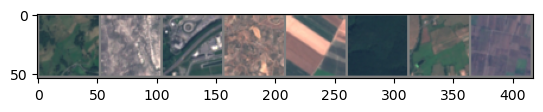

Predicted: 5 7 3 6 0 1 5 2


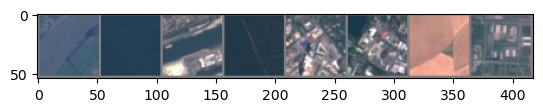

Predicted: 8 9 8 1 4 4 0 4


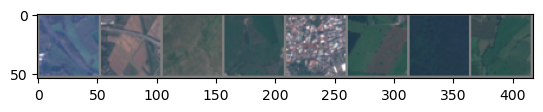

Predicted: 3 6 2 5 4 5 1 5


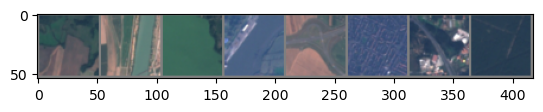

Predicted: 0 6 9 8 3 7 4 9


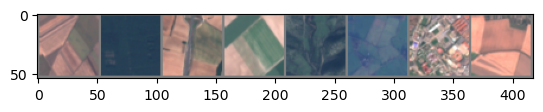

Predicted: 3 1 6 0 3 5 2 0


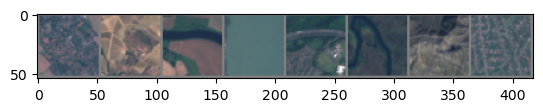

Predicted: 7 6 0 9 8 2 2 7


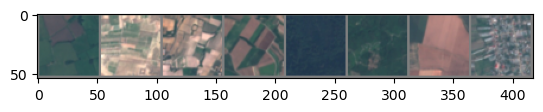

Predicted: 5 6 6 6 1 5 0 4


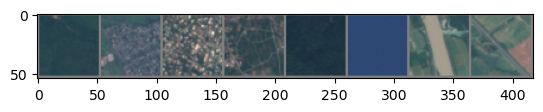

Predicted: 1 7 7 2 1 9 0 8


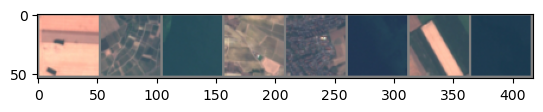

Predicted: 0 7 9 6 7 9 0 9
Epoch 4, Loss: 0.6558607366349962
Finished Training


In [41]:
# Number of training epochs
num_epochs = 4

testiter = iter(test_loader)
# Main training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 20 == 0:
            with torch.no_grad():
                # Show a sample of images from the test data and model's predictions
                test_images, test_labels = testiter.__next__()
                test_images, test_labels = test_images.to(device), test_labels.to(device)

                imshow(torchvision.utils.make_grid(test_images[:8].cpu()))
                test_outputs = net(test_images[:8])
                _, predicted = torch.max(test_outputs, 1)
                print('Predicted:', ' '.join('%d' % predicted[j] for j in range(8)))

    # Print average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1)}")


print('Finished Training')

In [42]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Test accuracy: 80.50%


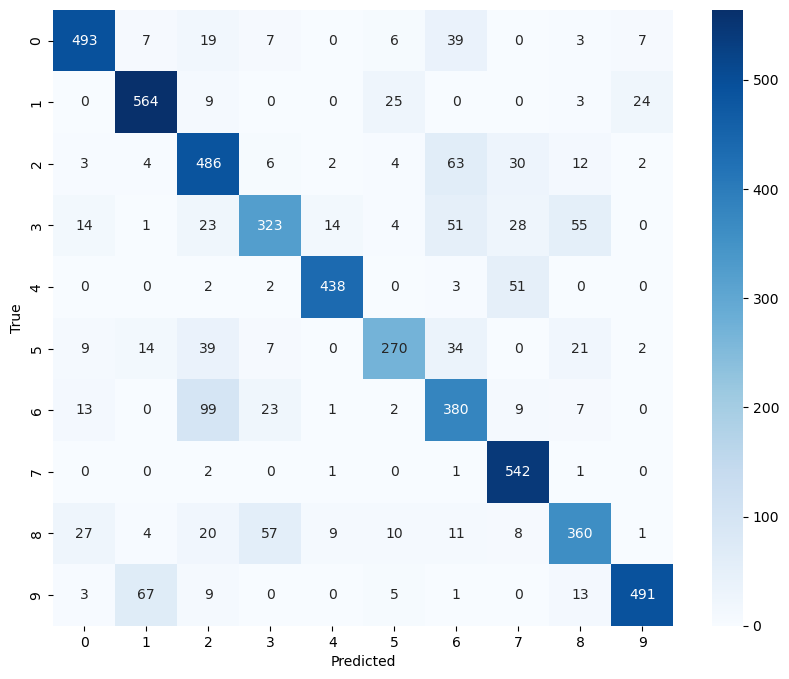

In [43]:
# Evaluation on the test set
net.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

accuracy = 100 * correct / total
print(f'Test accuracy: {accuracy:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

tensor([9, 4, 3, 8, 4])


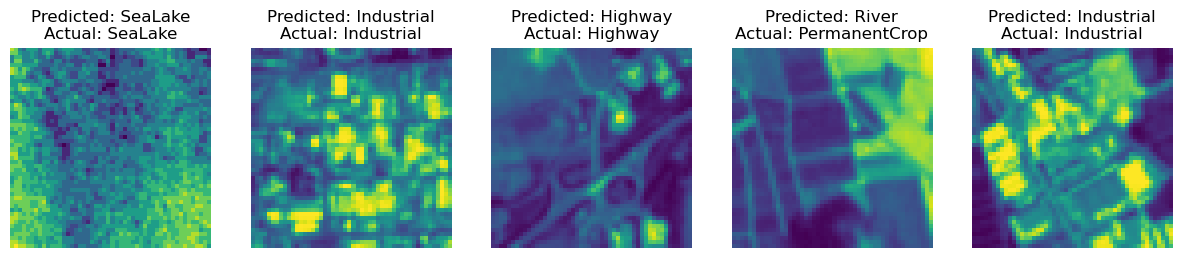

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'test_loader' is already defined
dataiter = iter(test_loader)

# Get 5 random images and labels
num_images = 5
random_indices = np.random.choice(len(test_loader.dataset), num_images, replace=False)
selected_images = [test_loader.dataset[i][0] for i in random_indices]
selected_labels = [test_loader.dataset[i][1] for i in random_indices]

# Perform inference on selected images
outputs = net(torch.stack(selected_images))
_, predicted = torch.max(outputs, 1)

print(predicted)

# Prepare for displaying
classes = ['AnnualCrop', 'Forest', 'HerbaceousVegetation','Highway','Industrial','Pasture','PermanentCrop','Residential','River','SeaLake']  # Replace with actual class labels

# Show the images along with predicted and actual labels
plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(selected_images[i][0])  # Assuming images are grayscale
    plt.title(f'Predicted: {classes[predicted[i]]}\nActual: {classes[selected_labels[i]]}')
    plt.axis('off')

plt.show()
